<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",100)

# Data Gathering

In [2]:
df=pd.read_csv('car_dataset.csv')

# Data Preparation

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [7]:
df.corr()['Selling_Price'].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

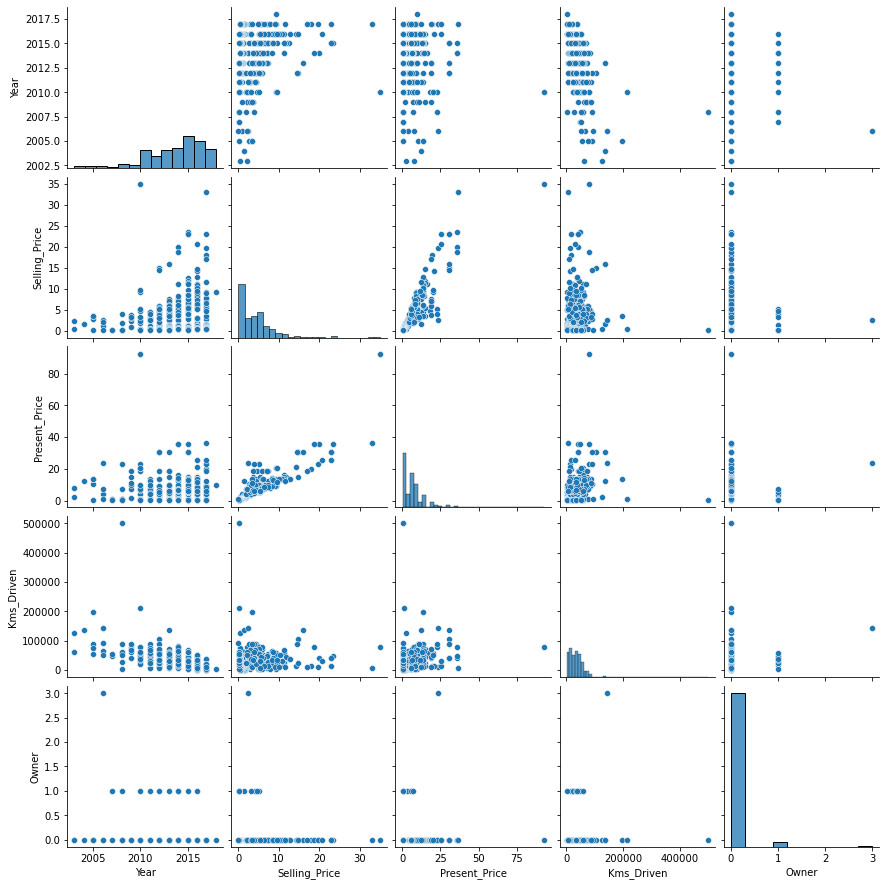

In [8]:
sns.pairplot(df)

<AxesSubplot:>

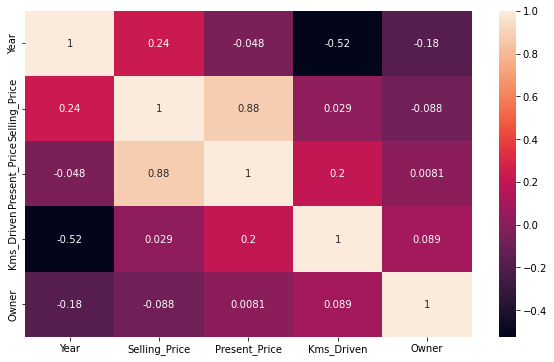

In [9]:
sns.heatmap(df.corr(), annot=True)

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [10]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [11]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [12]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [14]:
df['Year']=2022-df['Year']

In [15]:
df_dummies=pd.get_dummies(df,drop_first=True)
df_dummies

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,8,3.35,5.59,27000,0,0,1,0,1
1,9,4.75,9.54,43000,0,1,0,0,1
2,5,7.25,9.85,6900,0,0,1,0,1
3,11,2.85,4.15,5200,0,0,1,0,1
4,8,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,6,9.50,11.60,33988,0,1,0,0,1
297,7,4.00,5.90,60000,0,0,1,0,1
298,13,3.35,11.00,87934,0,0,1,0,1
299,5,11.50,12.50,9000,0,1,0,0,1


### Features and target variable

### Splitting data into training and testing

In [16]:
X=df_dummies.drop(['Selling_Price'],axis=1)

In [17]:
y=df[['Selling_Price']]

In [18]:
y.shape

(301, 1)

In [19]:
X.shape


(301, 8)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [23]:
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = lm.predict(X_test)

# Model Evaluation

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [28]:
eval_metric(y_test, y_pred) # 0.81 oranında açıklıyor 

Model testing performance:
--------------------------
R2_score 	: 0.8172782474447546
MAE 		: 1.2878826382841537
MSE 		: 3.3804678399573924
RMSE 		: 1.8386048623772844


In [29]:
y_pred = lm.predict(X_train)

In [30]:
eval_metric(y_train, y_pred)   

Model testing performance:
--------------------------
R2_score 	: 0.8928958124202901
MAE 		: 1.1403638852033775
MSE 		: 2.9536023211642255
RMSE 		: 1.7186047600202397


#### Overfitting var

# Regularization

## Scaling

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler()

In [32]:
scaler.fit(X_train)

MinMaxScaler()

In [33]:
X_train_scaled = scaler.transform(X_train)

In [34]:
X_test_scaled = scaler.transform(X_test)

In [35]:
model=LinearRegression()

In [36]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [38]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [39]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.892896,0.817278
mae,1.140364,1.287883
mse,2.953602,3.380468
rmse,1.718605,1.838605


### Cross Validation

In [40]:
from sklearn.model_selection import cross_validate, cross_val_score

In [41]:
model_cv = LinearRegression()
scores = cross_validate(model_cv, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [42]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002001,0.003999,0.433288,-1.516722,-8.487326,-2.913302
2,0.002001,0.003999,0.795524,-1.391818,-4.973951,-2.230236
3,0.001999,0.003000,0.935306,-1.044482,-1.911249,-1.382479
4,0.001999,0.003000,0.849487,-1.268014,-5.420901,-2.328283
5,0.002000,0.002000,0.841452,-1.202200,-5.038450,-2.244649


In [43]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.771011
test_neg_mean_absolute_error       -1.284647
test_neg_mean_squared_error        -5.166376
test_neg_root_mean_squared_error   -2.219790
dtype: float64

In [44]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.892896,0.817278
mae,1.140364,1.287883
mse,2.953602,3.380468
rmse,1.718605,1.838605


# Ridge

In [45]:
from sklearn.linear_model import Ridge,RidgeCV

In [46]:
ridge_model = Ridge(alpha=1, random_state=42)

In [47]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [48]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [49]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.833805,0.775099
mae,1.376066,1.480386
mse,4.583138,4.160803
rmse,2.140826,2.039805


In [50]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.892896,0.817278,0.833805,0.775099
mae,1.140364,1.287883,1.376066,1.480386
mse,2.953602,3.380468,4.583138,4.160803
rmse,1.718605,1.838605,2.140826,2.039805


In [51]:
alpha_space = np.linspace(0.01, 1, 100)

In [52]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [53]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [54]:
ridge_cv_model.alpha_

0.19

In [55]:
ridge_cv_model.best_score_

-1.9625431308531076

In [56]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [57]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.887826,0.811294
mae,1.173030,1.329779
mse,3.093423,3.491178
rmse,1.758813,1.868469


In [58]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.892896,0.817278,0.833805,0.775099,0.887826,0.811294
mae,1.140364,1.287883,1.376066,1.480386,1.173030,1.329779
mse,2.953602,3.380468,4.583138,4.160803,3.093423,3.491178
rmse,1.718605,1.838605,2.140826,2.039805,1.758813,1.868469


# Lasso

In [59]:
from sklearn.linear_model import Lasso, LassoCV

In [60]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [61]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [62]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.154359,0.176500
mae,3.118397,2.713117
mse,23.320175,15.235270
rmse,4.829097,3.903238


In [63]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.892896,0.817278,0.833805,0.775099,0.887826,0.811294,0.154359,0.176500
mae,1.140364,1.287883,1.376066,1.480386,1.173030,1.329779,3.118397,2.713117
mse,2.953602,3.380468,4.583138,4.160803,3.093423,3.491178,23.320175,15.235270
rmse,1.718605,1.838605,2.140826,2.039805,1.758813,1.868469,4.829097,3.903238


In [64]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [65]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [66]:
lasso_cv_model.alpha_

0.03

In [67]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.03)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [68]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.884184,0.810954
mae,1.155333,1.312965
mse,3.193849,3.497467
rmse,1.787134,1.870151


In [69]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.892896,0.817278,0.833805,0.775099,0.887826,0.811294,0.154359,0.176500,0.884184,0.810954
mae,1.140364,1.287883,1.376066,1.480386,1.173030,1.329779,3.118397,2.713117,1.155333,1.312965
mse,2.953602,3.380468,4.583138,4.160803,3.093423,3.491178,23.320175,15.235270,3.193849,3.497467
rmse,1.718605,1.838605,2.140826,2.039805,1.758813,1.868469,4.829097,3.903238,1.787134,1.870151


## Elastic-Net 

In [70]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [71]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [72]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [73]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.203194,0.249204
mae,3.080474,2.598646
mse,21.973434,13.890199
rmse,4.687583,3.726956


In [74]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [75]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.250566,-2.780934,-11.223850,-3.350201
2,0.175573,-3.152509,-20.054431,-4.478217
3,0.192791,-3.297600,-23.847145,-4.883354
4,0.159679,-3.222111,-30.265226,-5.501384
5,0.180141,-3.070686,-26.054066,-5.104318


In [76]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.191750
test_neg_mean_absolute_error        -3.104768
test_neg_mean_squared_error        -22.288943
test_neg_root_mean_squared_error    -4.663495
dtype: float64

In [77]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.203194,0.249204
mae,3.080474,2.598646
mse,21.973434,13.890199
rmse,4.687583,3.726956


In [78]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [79]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [80]:
elastic_cv_model.alpha_

0.03

In [81]:
elastic_cv_model.l1_ratio_

1.0

In [82]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [83]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.884184,0.810954
mae,1.155333,1.312965
mse,3.193849,3.497467
rmse,1.787134,1.870151


## Grid Search

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [86]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [87]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [88]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ..............................alpha=0.6, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.6, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [89]:
grid_model.best_params_

{'alpha': 0.012, 'l1_ratio': 0.95}

In [90]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [91]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.885041,0.810761
mae,1.171352,1.330536
mse,3.170213,3.501045
rmse,1.780509,1.871108


## Final Model

In [92]:
elastic_model = ElasticNet(alpha=0.012, l1_ratio=0.95, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.012, l1_ratio=0.95, random_state=42)

In [93]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [94]:
final=train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
final

,elastic_cv_train,elastic_cv_test
R2,0.885041,0.810761
mae,1.171352,1.330536
mse,3.170213,3.501045
rmse,1.780509,1.871108


In [95]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [96]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8107607974205139
MAE 		: 1.3305359440899436
MSE 		: 3.501044782206314
RMSE 		: 1.8711079023419024
